### Get data

In [87]:
import json 
import pandas as pd
import glob

df = pd.DataFrame()
with open("/Users/ryanyoung/Desktop/Projects/2Music/PersonalMusic/data/Streaming_History_Audio_2015-2017_0.json", 'r', encoding="utf-8") as f:
    data = json.load(f)
    df = pd.DataFrame(data)


In [80]:
# Load all StreamingHistory JSON files into a single DataFrame
files = glob.glob("PersonalMusic/data/*StreamingHistory*.json")
dfs = []

for file in files:
    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)
        dfs.append(pd.DataFrame(data))

In [81]:
dfs

[]

In [75]:
artist_playtime = df.groupby('master_metadata_album_artist_name')['ms_played'].sum().reset_index()
artist_playtime = artist_playtime.sort_values(by='ms_played', ascending=False)

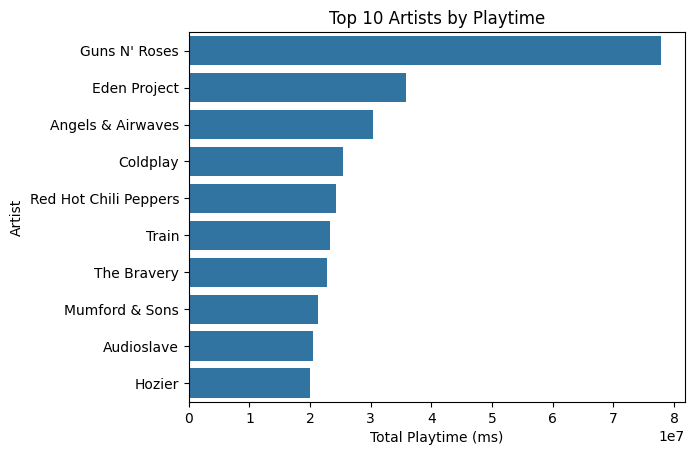

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 10 artists by playtime
top_artists = artist_playtime.head(10)
sns.barplot(x='ms_played', y='master_metadata_album_artist_name', data=top_artists)
plt.title("Top 10 Artists by Playtime")
plt.xlabel("Total Playtime (ms)")
plt.ylabel("Artist")
plt.show()